# ABC Analysis

In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Import the dataset
# Read the file
data = pd.read_excel("Item_data.xlsx")

In [3]:
# Define the function for ABC Segmentation
def ABC_segmentation(perc):
   # Creates the 3 classes A, B, and C based on cost percentages (A-60%, B-25%, C-15%)
 
    if perc > 0 and perc < 0.6:
        return 'A'
    elif perc >= 0.6 and perc < 0.85:
        return 'B'
    elif perc >= 0.85:
        return 'C'

In [4]:
# Run the head function
data.head()

,Number,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
0,1,693,Historical,145889,1,1,D,9,1,2338,244.6,2010,851,135.90,48.98
1,2,609,Historical,435034,1,2,D,9,1,1746,281.8,2012,616,173.30,48.99
2,3,84052,Historical,538479,0,0,S,3,1,85265,2645.3,2009,49,4.98,72.05
3,4,5982,Historical,212633,1,7,D,8,1,12749,235.6,2009,521,173.30,38.92
4,5,3958,Historical,212480,1,1,D,8,1,14870,208.8,2008,579,135.90,39.46


In [29]:
# order by the field of interest
data= data.sort_values(by=['PriceReg'], ascending=False)
data.head()


,Number,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice,RunCumRev,RunPerc,Class
101,102,58408,Historical,742000,0,0,S,8,1,1128045,3986.31,2009,14,109.98,675.00,3986.31,0.050815,A
3012,3013,15900,Historical,2362243,0,0,D,1,0,1356244,2800.00,2003,6,466.89,252.99,6786.31,0.099664,A
170,171,39729,Historical,531396,0,0,S,2,1,1212101,2707.22,2004,18,0.00,81.28,9493.53,0.358526,A
2,3,84052,Historical,538479,0,0,S,3,1,85265,2645.30,2009,49,4.98,72.05,12138.83,0.430204,A
498,499,39223,Historical,2330787,0,0,S,3,1,2926373,2432.64,1983,14,94.78,78.75,14571.47,0.374443,A


In [30]:
# create the column of the running Cumulative Revenue per SKU, use  the cumsum() function
data['RunCumRev'] = data['PriceReg'].cumsum()
data.head()

,Number,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice,RunCumRev,RunPerc,Class
101,102,58408,Historical,742000,0,0,S,8,1,1128045,3986.31,2009,14,109.98,675.00,3986.31,0.050815,A
3012,3013,15900,Historical,2362243,0,0,D,1,0,1356244,2800.00,2003,6,466.89,252.99,6786.31,0.099664,A
170,171,39729,Historical,531396,0,0,S,2,1,1212101,2707.22,2004,18,0.00,81.28,9493.53,0.358526,A
2,3,84052,Historical,538479,0,0,S,3,1,85265,2645.30,2009,49,4.98,72.05,12138.83,0.430204,A
498,499,39223,Historical,2330787,0,0,S,3,1,2926373,2432.64,1983,14,94.78,78.75,14571.47,0.374443,A


In [32]:
# Calculate total sum of additive cost
Total_Sum = data['PriceReg'].sum()
print(Total_Sum)


7503130.22


In [33]:
# create the column of the running percentage
data['RunPerc'] =  data['RunCumRev']/Total_Sum
data.head()

,Number,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice,RunCumRev,RunPerc,Class
101,102,58408,Historical,742000,0,0,S,8,1,1128045,3986.31,2009,14,109.98,675.00,3986.31,0.000531,A
3012,3013,15900,Historical,2362243,0,0,D,1,0,1356244,2800.00,2003,6,466.89,252.99,6786.31,0.000904,A
170,171,39729,Historical,531396,0,0,S,2,1,1212101,2707.22,2004,18,0.00,81.28,9493.53,0.001265,A
2,3,84052,Historical,538479,0,0,S,3,1,85265,2645.30,2009,49,4.98,72.05,12138.83,0.001618,A
498,499,39223,Historical,2330787,0,0,S,3,1,2926373,2432.64,1983,14,94.78,78.75,14571.47,0.001942,A


In [34]:
# create the column of the class by using the user defined function
data['Class'] = data['RunPerc'].apply(ABC_segmentation)
data.head()

,Number,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice,RunCumRev,RunPerc,Class
101,102,58408,Historical,742000,0,0,S,8,1,1128045,3986.31,2009,14,109.98,675.00,3986.31,0.000531,A
3012,3013,15900,Historical,2362243,0,0,D,1,0,1356244,2800.00,2003,6,466.89,252.99,6786.31,0.000904,A
170,171,39729,Historical,531396,0,0,S,2,1,1212101,2707.22,2004,18,0.00,81.28,9493.53,0.001265,A
2,3,84052,Historical,538479,0,0,S,3,1,85265,2645.30,2009,49,4.98,72.05,12138.83,0.001618,A
498,499,39223,Historical,2330787,0,0,S,3,1,2926373,2432.64,1983,14,94.78,78.75,14571.47,0.001942,A


In [35]:
# Show the numbers in each class
data.Class.value_counts()

C    28431
A    24933
B    22632
Name: Class, dtype: int64

In [37]:
# Calculate and print total revenue per class

print ('Cost of Class A :', round(data[data.Class == 'A']['PriceReg'].sum(), 2))
print ('Cost of Class B :', round(data[data.Class == 'B']['PriceReg'].sum(), 2))
print ('Cost of Class C :', round(data[data.Class == 'C']['PriceReg'].sum(), 2))


Cost of Class A : 4501772.69
Cost of Class B : 1875833.59
Cost of Class C : 1125523.94


In [38]:
# Calculate and print the percent of cost per class
print ('Percent of Cost of Class A :', round(data[data.Class == 'A']['PriceReg'].sum()/data['PriceReg'].sum()*100,2))
print ('Percent of Cost of Class B :', round(data[data.Class == 'B']['PriceReg'].sum()/data['PriceReg'].sum()*100, 2))
print ('Percent of Cost of Class C :', round(data[data.Class == 'C']['PriceReg'].sum()/data['PriceReg'].sum()*100, 2))


Percent of Cost of Class A : 60.0
Percent of Cost of Class B : 25.0
Percent of Cost of Class C : 15.0


In [39]:
# Calculate and print the percent of quantity per class
print ('Percent of ItemCount Class A :', round(data[data.Class == 'A']['Class'].count()/data['Class'].count()*100, 2))
print ('Percent of ItemCount Class B :', round(data[data.Class == 'B']['Class'].count()/data['Class'].count()*100, 2))
print ('Percent of ItemCount Class C :', round(data[data.Class == 'C']['Class'].count()/data['Class'].count()*100, 2))


Percent of ItemCount Class A : 32.81
Percent of ItemCount Class B : 29.78
Percent of ItemCount Class C : 37.41


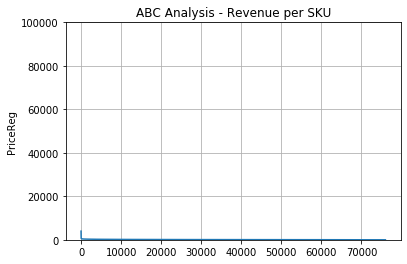

In [41]:
# Convert the Cost column to a list
visual = data['PriceReg'].tolist()
y_pos = np.arange(len(visual))

plt.plot(y_pos, visual)
plt.ylabel('PriceReg')
plt.title('ABC Analysis - Revenue per SKU')
plt.grid(True)
plt.ylim((0,100000))
plt.show()

# Plot that list, Provide proper headings to the plot


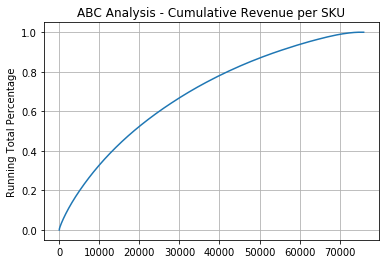

In [42]:
# Convert the running percentage column to a list
visual = data['RunPerc'].tolist()
y_pos = np.arange(len(visual))

plt.plot(y_pos, visual)
plt.ylabel('Running Total Percentage')
plt.title('ABC Analysis - Cumulative Revenue per SKU')
plt.grid(True)
plt.show()


# Plot that list, Provide proper headings to the plot